<a href="https://colab.research.google.com/github/bomiiisong/AI_Project/blob/master/Modeling/BaseModel_with_snapshotImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/photographer.zip'

-rw------- 1 root root 40436549 Apr 12 07:11 '/content/drive/My Drive/Colab Notebooks/datasets/photographer.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/photographer.zip

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/unseen.zip

In [4]:
train_dir = 'train'
valid_dir = 'test'

In [6]:
test_dir = 'hold'

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,target_size = (640, 640),
                                                    batch_size = 23,class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size = (640, 640),
                                                    batch_size = 17,class_mode = 'binary')

Found 368 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [8]:
for pred, label in train_generator:
  print(pred.shape)
  print(label.shape)
  print(label)
  break

(23, 640, 640, 3)
(23,)
[1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


In [9]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (640, 640, 3))

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':       
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
______________________________________________________________

In [11]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))   

model.summary()


model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 20, 20, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               52429056  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 67,144,001
Trainable params: 59,508,737
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
%%time

Hist = model.fit(train_generator, 
                 steps_per_epoch = train_generator.samples // train_generator.batch_size, 
                 epochs = 50, 
                 validation_data = valid_generator,
                 validation_steps=valid_generator.samples // valid_generator.batch_size)

Epoch 1/50
16/16 [==============================] - 145s 5s/step - loss: 0.7764 - accuracy: 0.4959 - val_loss: 0.5129 - val_accuracy: 0.7765
Epoch 2/50
16/16 [==============================] - 49s 3s/step - loss: 0.4561 - accuracy: 0.8011 - val_loss: 0.4318 - val_accuracy: 0.7941
Epoch 3/50
16/16 [==============================] - 48s 3s/step - loss: 0.2989 - accuracy: 0.8906 - val_loss: 0.3605 - val_accuracy: 0.8353
Epoch 4/50
16/16 [==============================] - 48s 3s/step - loss: 0.2079 - accuracy: 0.9276 - val_loss: 0.3175 - val_accuracy: 0.8471
Epoch 5/50
16/16 [==============================] - 49s 3s/step - loss: 0.1566 - accuracy: 0.9529 - val_loss: 0.2859 - val_accuracy: 0.8765
Epoch 6/50
16/16 [==============================] - 48s 3s/step - loss: 0.1058 - accuracy: 0.9892 - val_loss: 0.2667 - val_accuracy: 0.8824
Epoch 7/50
16/16 [==============================] - 49s 3s/step - loss: 0.0585 - accuracy: 0.9989 - val_loss: 0.2862 - val_accuracy: 0.8647
Epoch 8/50
16/16 [=

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,target_size = (640, 640),
                                                  class_mode = 'binary')

Found 0 images belonging to 0 classes.


In [17]:
loss, accuracy = model.evaluate(valid_generator)
loss, accuracy

10/10 [==============================] - 8s 805ms/step - loss: 0.3646 - accuracy: 0.8941


(0.364644318819046, 0.8941176533699036)

## confusion matrix_1Batch

In [ ]:
for pred, label in valid_generator:
  print('prediction: ', pred.shape)
  print('label: ', label.shape)
  break

prediction:  (19, 640, 640, 3)
label:  (19, 2)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

for t,a in valid_generator:
  # (images, labels)
  # ((20,640,640,3) / 20)
  print(model.predict(t[0]))
  break
  # pred = [round(p[0]) for p in model.predict(t[0])]
  # print('Batch')
  # print(accuracy_score(t[1],pred))
  # print(confusion_matrix(t[1], pred), end='\n\n')
  # break

In [ ]:
model.predict(img[0])[1]

array([0.20094153], dtype=float32)

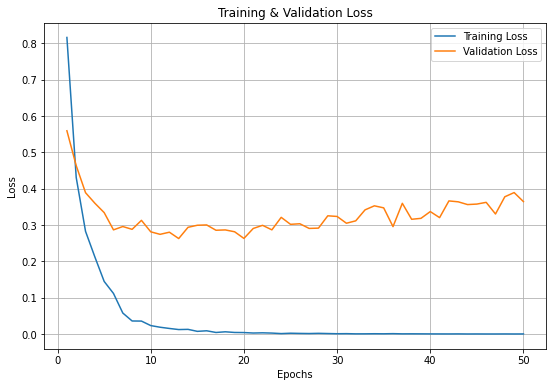

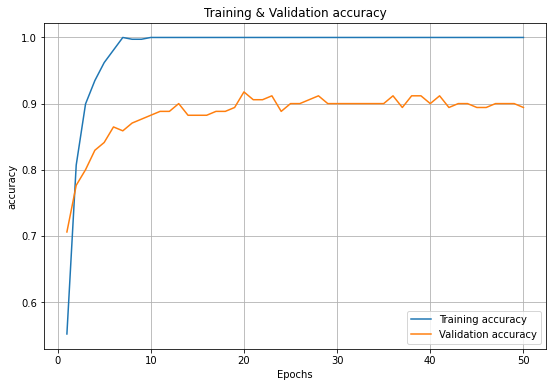

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])

plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

## Test Data 분류하기

참고 사이트 : https://towardsdatascience.com/how-to-predict-an-image-with-keras-ca97d9cd4817

In [20]:
import pathlib
from glob import glob

data_root = pathlib.Path(glob('/content/*/')[3])
print(data_root)
# label = ['0','1']

/content/hold


In [51]:
import random

all_image_paths = list(data_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths]

random.choice(all_image_paths)

'/content/hold/전신샷그램1355.jpg'

In [52]:
from tensorflow.keras.preprocessing import image
test_img = '/content/hold/전신샷그램1355.jpg'

img = image.load_img(test_img, target_size=(640, 640))

In [54]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img_array = image.img_to_array(img) # img를 array로 변경
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

In [55]:
prediction = model.predict_classes(img_preprocessed)
print(prediction)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]]


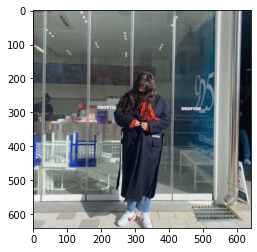

In [53]:
plt.imshow(img)
plt.show()

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))

# 이미지 분류
logits = model.predict(test_img)
# prediction = softmax(logits)
# arr = prediction.astype(np.int)
# arr = prediction[0]

#이미지 출력
# plt.subplot(5,4, n+1)
# plt.imshow(plt.imread(image_path))
# idx = test_img.split('/')[-2]
# plt.title('label: ' + str(idx))
plt.xlabel(logits)

IndexError: ignored

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


InvalidArgumentError: ignored

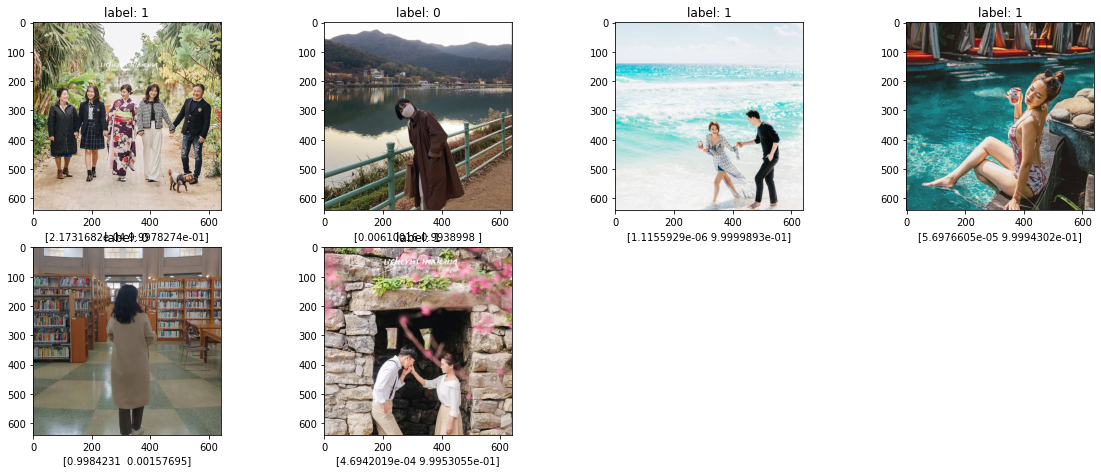

In [25]:
import cv2

plt.figure(figsize=((20, 20)))

def softmax(x):
    m = np.max(x)
    sm = np.exp(x - m)/np.sum(np.exp(x - m))
    return sm
  
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

for n in range(20):
    #랜덤 이미지 경로 추출
    image_path = random.choice(all_image_paths)

    #이미지 크기 변경 및 정규화
    img = cv2.imread(image_path)
    # img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0  # 3차원 행렬(224, 224, 3)
    img = np.expand_dims(img, axis=0)  # 4차원 (1, 224, 224, 3)

    # 이미지 분류
    logits = model.predict(img)[0]
    # prediction = softmax(logits)
    # arr = prediction.astype(np.int)
    # arr = prediction[0]

    #이미지 출력
    plt.subplot(5,4, n+1)
    plt.imshow(plt.imread(image_path))
    idx = image_path.split('/')[-2]
    plt.title('label: ' + str(idx))
    plt.xlabel(logits)


    #Top-5 예측값 출력 공간
    # plt.subplot(3, 2, n*2+2)

    # #이미지 크기 변경 및 정규화
    # img = cv2.imread(image_path)
    # # img = cv2.resize(img, dsize=(224, 224))
    # img = img / 255.0  # 3차원 행렬(224, 224, 3)
    # img = np.expand_dims(img, axis=0)  # 4차원 (1, 224, 224, 3)

    # # 이미지 분류
    # logits = model.predict(img)[0]
    # prediction = softmax(logits)

    #Top-5 예측값
    # top_2_predict = prediction.argsort()[::-1][:2]
    # labels = [label_text[index] for index in top_5_predict]

    # # Top-5 막대그래프 색상 지정
    # color = ['gray'] * 5
    # if idx in top_5_predict:
    #     color[top_5_predict.tolist().index(idx)] = 'green'
    # color = color[::-1]


    # # Top-5 막대그래프 출력
    # plt.barh(range(5), prediction[top_2_predict][::-1] * 100, color=color)
    # plt.yticks(idx)

In [ ]:
a = logits
a

array([0.0030835], dtype=float32)

In [ ]:
sigmoid(a)

0.5007708737106747

In [ ]:
import math 

def sigmoid(x):
  return 1 / (1 + math.exp(-x))